In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [3]:
df = pd.read_table(r"D:\Guvi\Projects\household_power_consumption.txt", sep=';')

C:\Users\navee\AppData\Local\Temp\ipykernel_9816\991220662.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(r"D:\Guvi\Projects\household_power_consumption.txt", sep=';')


In [4]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [6]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


In [7]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [8]:
df.shape

(2075259, 9)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [12]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [13]:
df1 = df.groupby('Global_active_power')['Global_reactive_power'].count().reset_index()


In [14]:
df1.head() 

,Global_active_power,Global_reactive_power
0,0.21,1
1,0.212,16
2,0.214,36
3,0.216,44
4,0.218,74


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Global_active_power    6533 non-null   object
 1   Global_reactive_power  6533 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 102.2+ KB


##### Before Removing Outlier Data Visualization

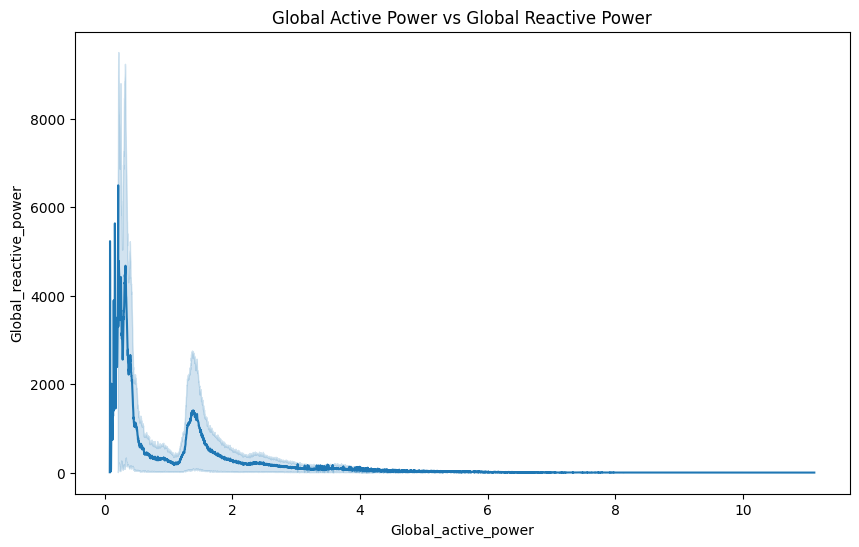

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Global_active_power', y='Global_reactive_power', data=df1)
plt.title('Global Active Power vs Global Reactive Power')
plt.show()

In [38]:
# Select only numeric columns
df1_numeric = df1.select_dtypes(include=[np.number])

# Check if df1_numeric is empty
if df1_numeric.empty:
    print("No numeric columns found in df1.")
else:
    # Calculate z-scores
    z_scores = stats.zscore(df1_numeric)

    # Define the threshold for identifying outliers
    threshold = 3

    # Identify outliers
    outliers_df = df1[(z_scores > threshold).any(axis=1)]

    print('Size before removing outliers:', df1.shape)
    print('Number of outliers identified:', outliers_df.shape[0])
    print('Outliers:')
    print(outliers_df)

Size before removing outliers: (6533, 2)
Number of outliers identified: 128
Outliers:
     Global_active_power  Global_reactive_power
2355               0.080                   5230
2356               0.082                   4466
2384               0.138                   3893
2392               0.154                   3869
2393               0.156                   5632
...                  ...                    ...
2529               0.428                   3708
2530               0.430                   3595
2531               0.432                   3465
2532               0.434                   3327
2533               0.436                   3237

[128 rows x 2 columns]


### After Removing Outlier lineplot data visualization

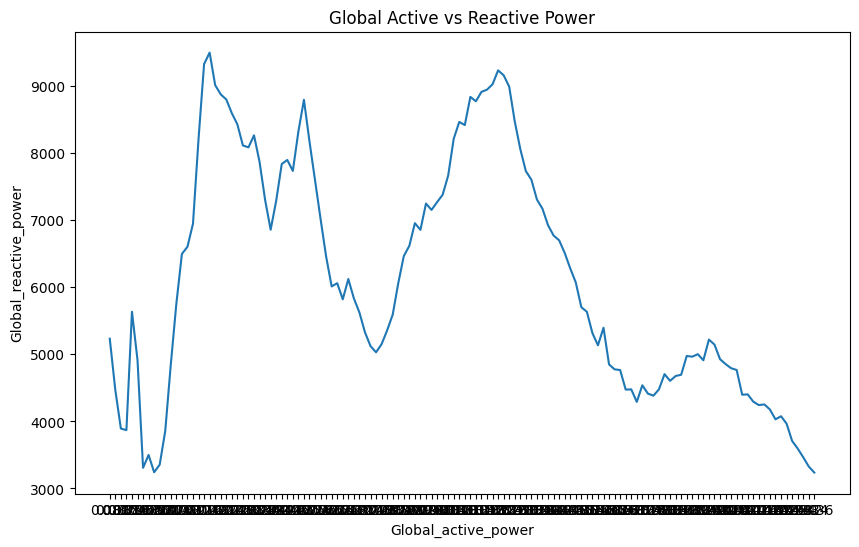

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Global_active_power', y='Global_reactive_power', data=outliers_df)
plt.title('Global Active vs Reactive Power')
plt.show()

In [42]:
df2 = df.groupby('Voltage')['Global_intensity'].count().reset_index()
df2.head()

,Voltage,Global_intensity
0,225.32,1
1,225.41,1
2,225.43,1
3,226.05,1
4,226.47,2


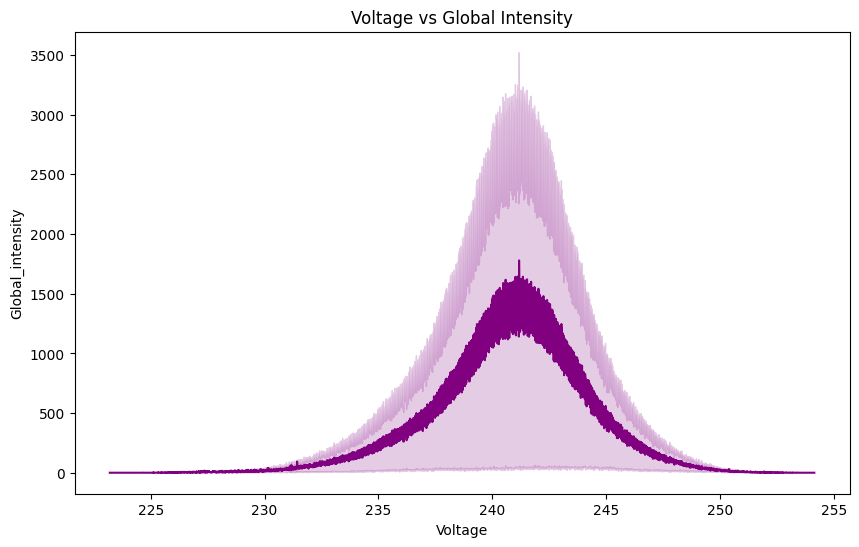

In [43]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Voltage', y='Global_intensity', data=df2, color='purple')
plt.title('Voltage vs Global Intensity')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [45]:
x = df.iloc[:,df.columns != 'Global_active_power']
y = df.iloc[:,df.columns == 'Global_active_power']


In [46]:
x.head()

,Date,Time,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,0.528,235.680,15.800,0.000,1.000,17.0


In [47]:
y.head()

,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

In [52]:
print('xtrain',x_train.shape)
print('xtest',x_test.shape)

xtrain (1434496, 8)
xtest (614784, 8)


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate GradientBoostingRegressor with parameters
gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate=1)


In [54]:
models = [
    ('Linear Regreesion model',LinearRegression()),
    ('Random Forest Regression',RandomForestRegressor()),
    ('Gradient Boosting Regressor',GradientBoostingRegressor())
]

In [55]:
df['date_column'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

C:\Users\navee\AppData\Local\Temp\ipykernel_9816\1721695355.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_column'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [56]:
df['year'] = df['date_column'].dt.year
df['month'] = df['date_column'].dt.month
df['day'] = df['date_column'].dt.day
df['day_of_week'] = df['date_column'].dt.dayofweek


In [66]:
df['date_column'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
reference_date = pd.Timestamp('2000-01-01')
df['days_since_reference'] = (df['date_column'] - reference_date).dt.days

C:\Users\navee\AppData\Local\Temp\ipykernel_9816\2289508211.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_column'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [67]:
df = df.drop(columns=['date_column'])


In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [135]:
models = [
    ('Linear Regression', LinearRegression()),
    ('Random Forest Regression', RandomForestRegressor()),
    ('Gradient Boosting Regressor', GradientBoostingRegressor())
]


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
for name, model in models:
    print(f"Evaluating {name}...\n")
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(f'{name} - Mean Squared Error: {mean_squared_error(y_test, y_predict)}')
    print(f'{name} - Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}')
    print(f'{name} - R-squared (R²): {r2_score(y_test, y_predict)}\n')


In [140]:
import pandas as pd

# Create 'date_column' by combining 'Date' and 'Time'
df['date_column'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Convert 'date_column' to datetime format
df['date_column'] = pd.to_datetime(df['date_column'], format='%d/%m/%Y')


C:\Users\navee\AppData\Local\Temp\ipykernel_9816\3409439414.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_column'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [141]:
# Extracting year, month, and day as separate features
df['year'] = df['date_column'].dt.year
df['month'] = df['date_column'].dt.month
df['day'] = df['date_column'].dt.day

# Alternatively, calculate the number of days since a reference date
reference_date = pd.Timestamp('2000-01-01')
df['days_since_reference'] = (df['date_column'] - reference_date).dt.days


In [142]:
df = df.drop(columns=['date_column'])


In [145]:
from sklearn.preprocessing import LabelEncoder

# Label encoding categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
	df[column] = df[column].astype(str)  # Convert all values to strings
	le = LabelEncoder()
	df[column] = le.fit_transform(df[column])
	label_encoders[column] = le


In [147]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Global_active_power'])  # Replace with your target column name
y = df['Global_active_power']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [148]:
for name, model in models:
    print(f"Evaluating {name}...\n")
    model.fit(x_train, y_train)
    y_predict = model.predict(x_test)
    print(f'{name} - Mean Squared Error: {mean_squared_error(y_test, y_predict)}')
    print(f'{name} - Mean Absolute Error: {mean_absolute_error(y_test, y_predict)}')
    print(f'{name} - R-squared (R²): {r2_score(y_test, y_predict)}\n')


Evaluating Linear Regression...

Linear Regression - Mean Squared Error: 119584.54817981366
Linear Regression - Mean Absolute Error: 235.4889689690475
Linear Regression - R-squared (R²): 0.7003413636201313

Evaluating Random Forest Regression...

Random Forest Regression - Mean Squared Error: 309.03625345096816
Random Forest Regression - Mean Absolute Error: 6.309820522329794
Random Forest Regression - R-squared (R²): 0.9992256074575637

Evaluating Gradient Boosting Regressor...

Gradient Boosting Regressor - Mean Squared Error: 8322.424364704606
Gradient Boosting Regressor - Mean Absolute Error: 35.18384851683795
Gradient Boosting Regressor - R-squared (R²): 0.9791454132288727



In [150]:
predict_output = model.predict(x_test)
predict_output

array([ 878.80253505,  207.17204817,  427.99241327, ...,   88.98879794,
       1472.61689704, 1227.70578759])

In [152]:
from sklearn.metrics import accuracy_score

In [156]:
print(type(predict_output))
print(predict_output[:5])  # Print first few predictions
print(y_test[:5])  # Print first few actual labels


<class 'numpy.ndarray'>
[878.80253505 207.17204817 427.99241327 118.22868485 772.37030005]
1030580    843
1815       166
1295977    314
206669     110
1048893    765
Name: Global_active_power, dtype: int64


In [158]:
predict_output = model.predict(x_test)  # Use predict, not predict_proba


In [160]:
predict_output = np.argmax(predict_output)  # For multi-class classification


In [161]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_test = encoder.fit_transform(y_test)  # Convert to numerical labels if needed


In [168]:
# Ensure predict_output is an array-like object
predict_output = model.predict(x_test)

# Calculate regression metrics
mse = mean_squared_error(y_test, predict_output)
mae = mean_absolute_error(y_test, predict_output)
r2 = r2_score(y_test, predict_output)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared (R²):', r2)

Mean Squared Error: 7327.593821685307
Mean Absolute Error: 35.4311296148581
R-squared (R²): 0.9804793563119819
